### HEART DISEASE PREDICTION USING MACHINE LEARNING

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 2. Dataset

In [3]:
data = pd.read_csv("framingham.csv")

In [4]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
data.shape

(4240, 16)

## 3. Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a crucial step in data science where analysts dive deep into a dataset to understand its characteristics, uncover patterns, and identify relationships between variables.

It's like exploring a new territory without a map, relying on your senses and observations to make discoveries. 

import warnings
warnings.filterwarnings('ignore')

#### 3.1 Missing Variables

In [6]:
#total percentage of missing data
missing_data = data.isnull().sum()
total_percentage = (missing_data.sum()/data.shape[0]) * 100
print(f'The total percentage of missing data is {round(total_percentage,2)}%')

The total percentage of missing data is 15.21%


In [7]:
# percentage of missing data per category
total = data.isnull().sum().sort_values(ascending=False)
percent_total = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

,Total,Percentage
glucose,388,9.150943
education,105,2.476415
BPMeds,53,1.250000
totChol,50,1.179245
cigsPerDay,29,0.683962
BMI,19,0.448113
heartRate,1,0.023585


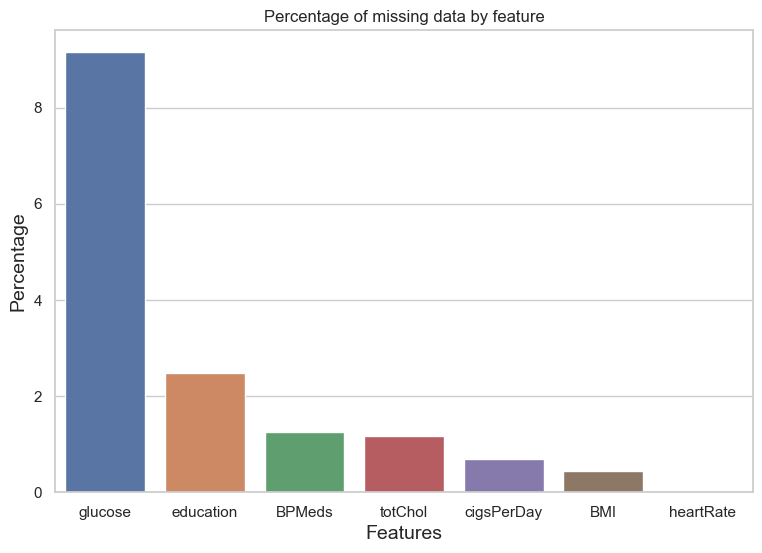

In [8]:
plt.figure(figsize=(9,6))
sns.set(style="whitegrid")
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data = missing_data)
plt.title('Percentage of missing data by feature')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.show()

In [9]:
data.dropna(axis=0, inplace=True)

In [10]:
data.shape

(3658, 16)

#### 3.2 Data Distribution

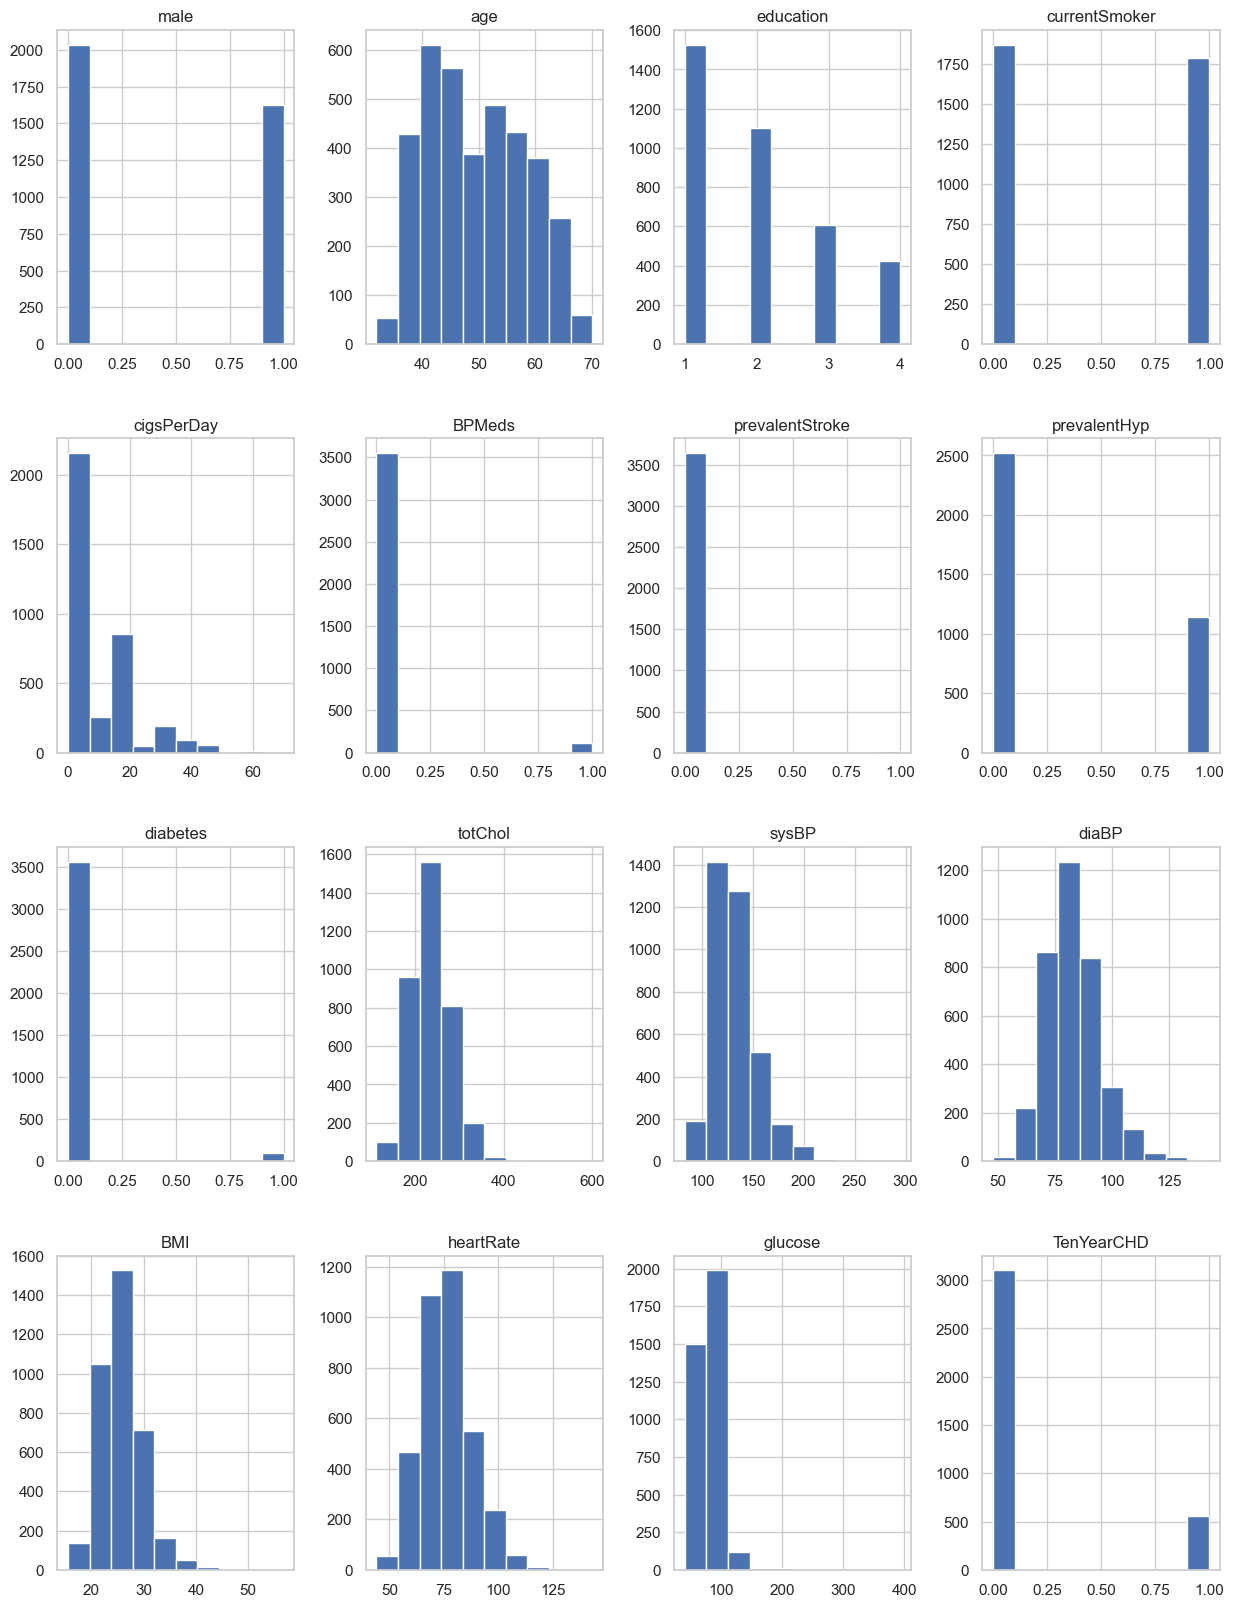

In [11]:
# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax = ax)
plt.show()

#### Case Counts

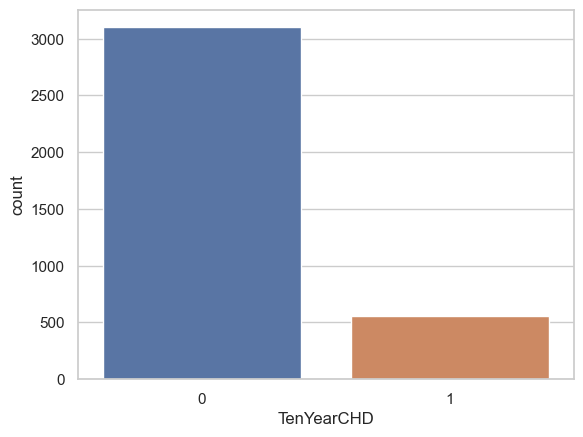

There are 3101 patients without heart disease and 557 patients with the disease


In [12]:
sns.countplot(x='TenYearCHD',data=data)
plt.show()
cases = data.TenYearCHD.value_counts()
print(f"There are {cases[0]} patients without heart disease and {cases[1]} patients with the disease")

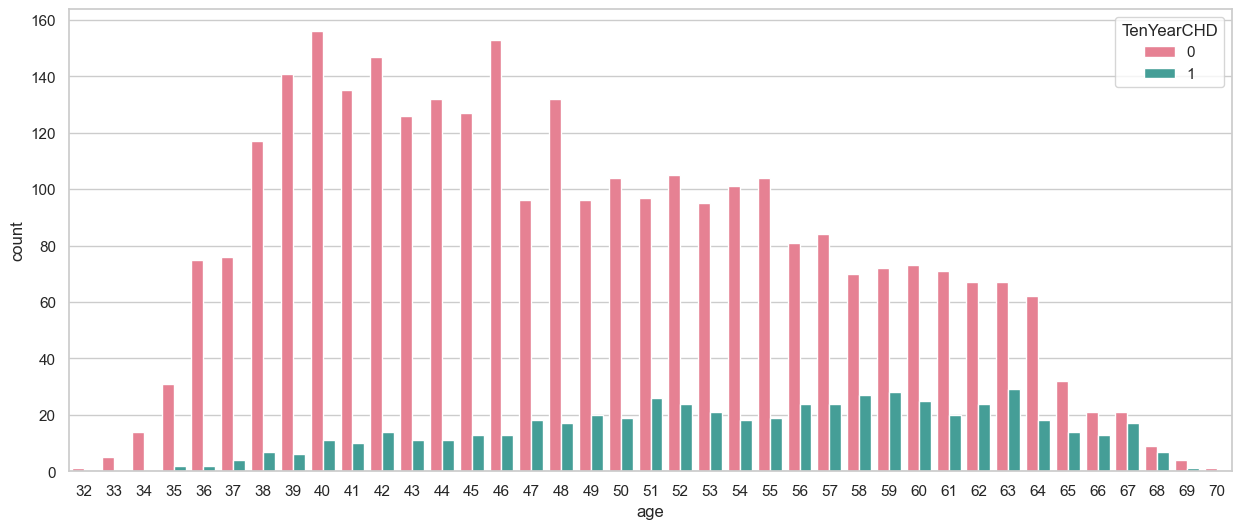

In [13]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = data, hue = 'TenYearCHD',palette='husl')
plt.show()

### 3.3 Data Analysis

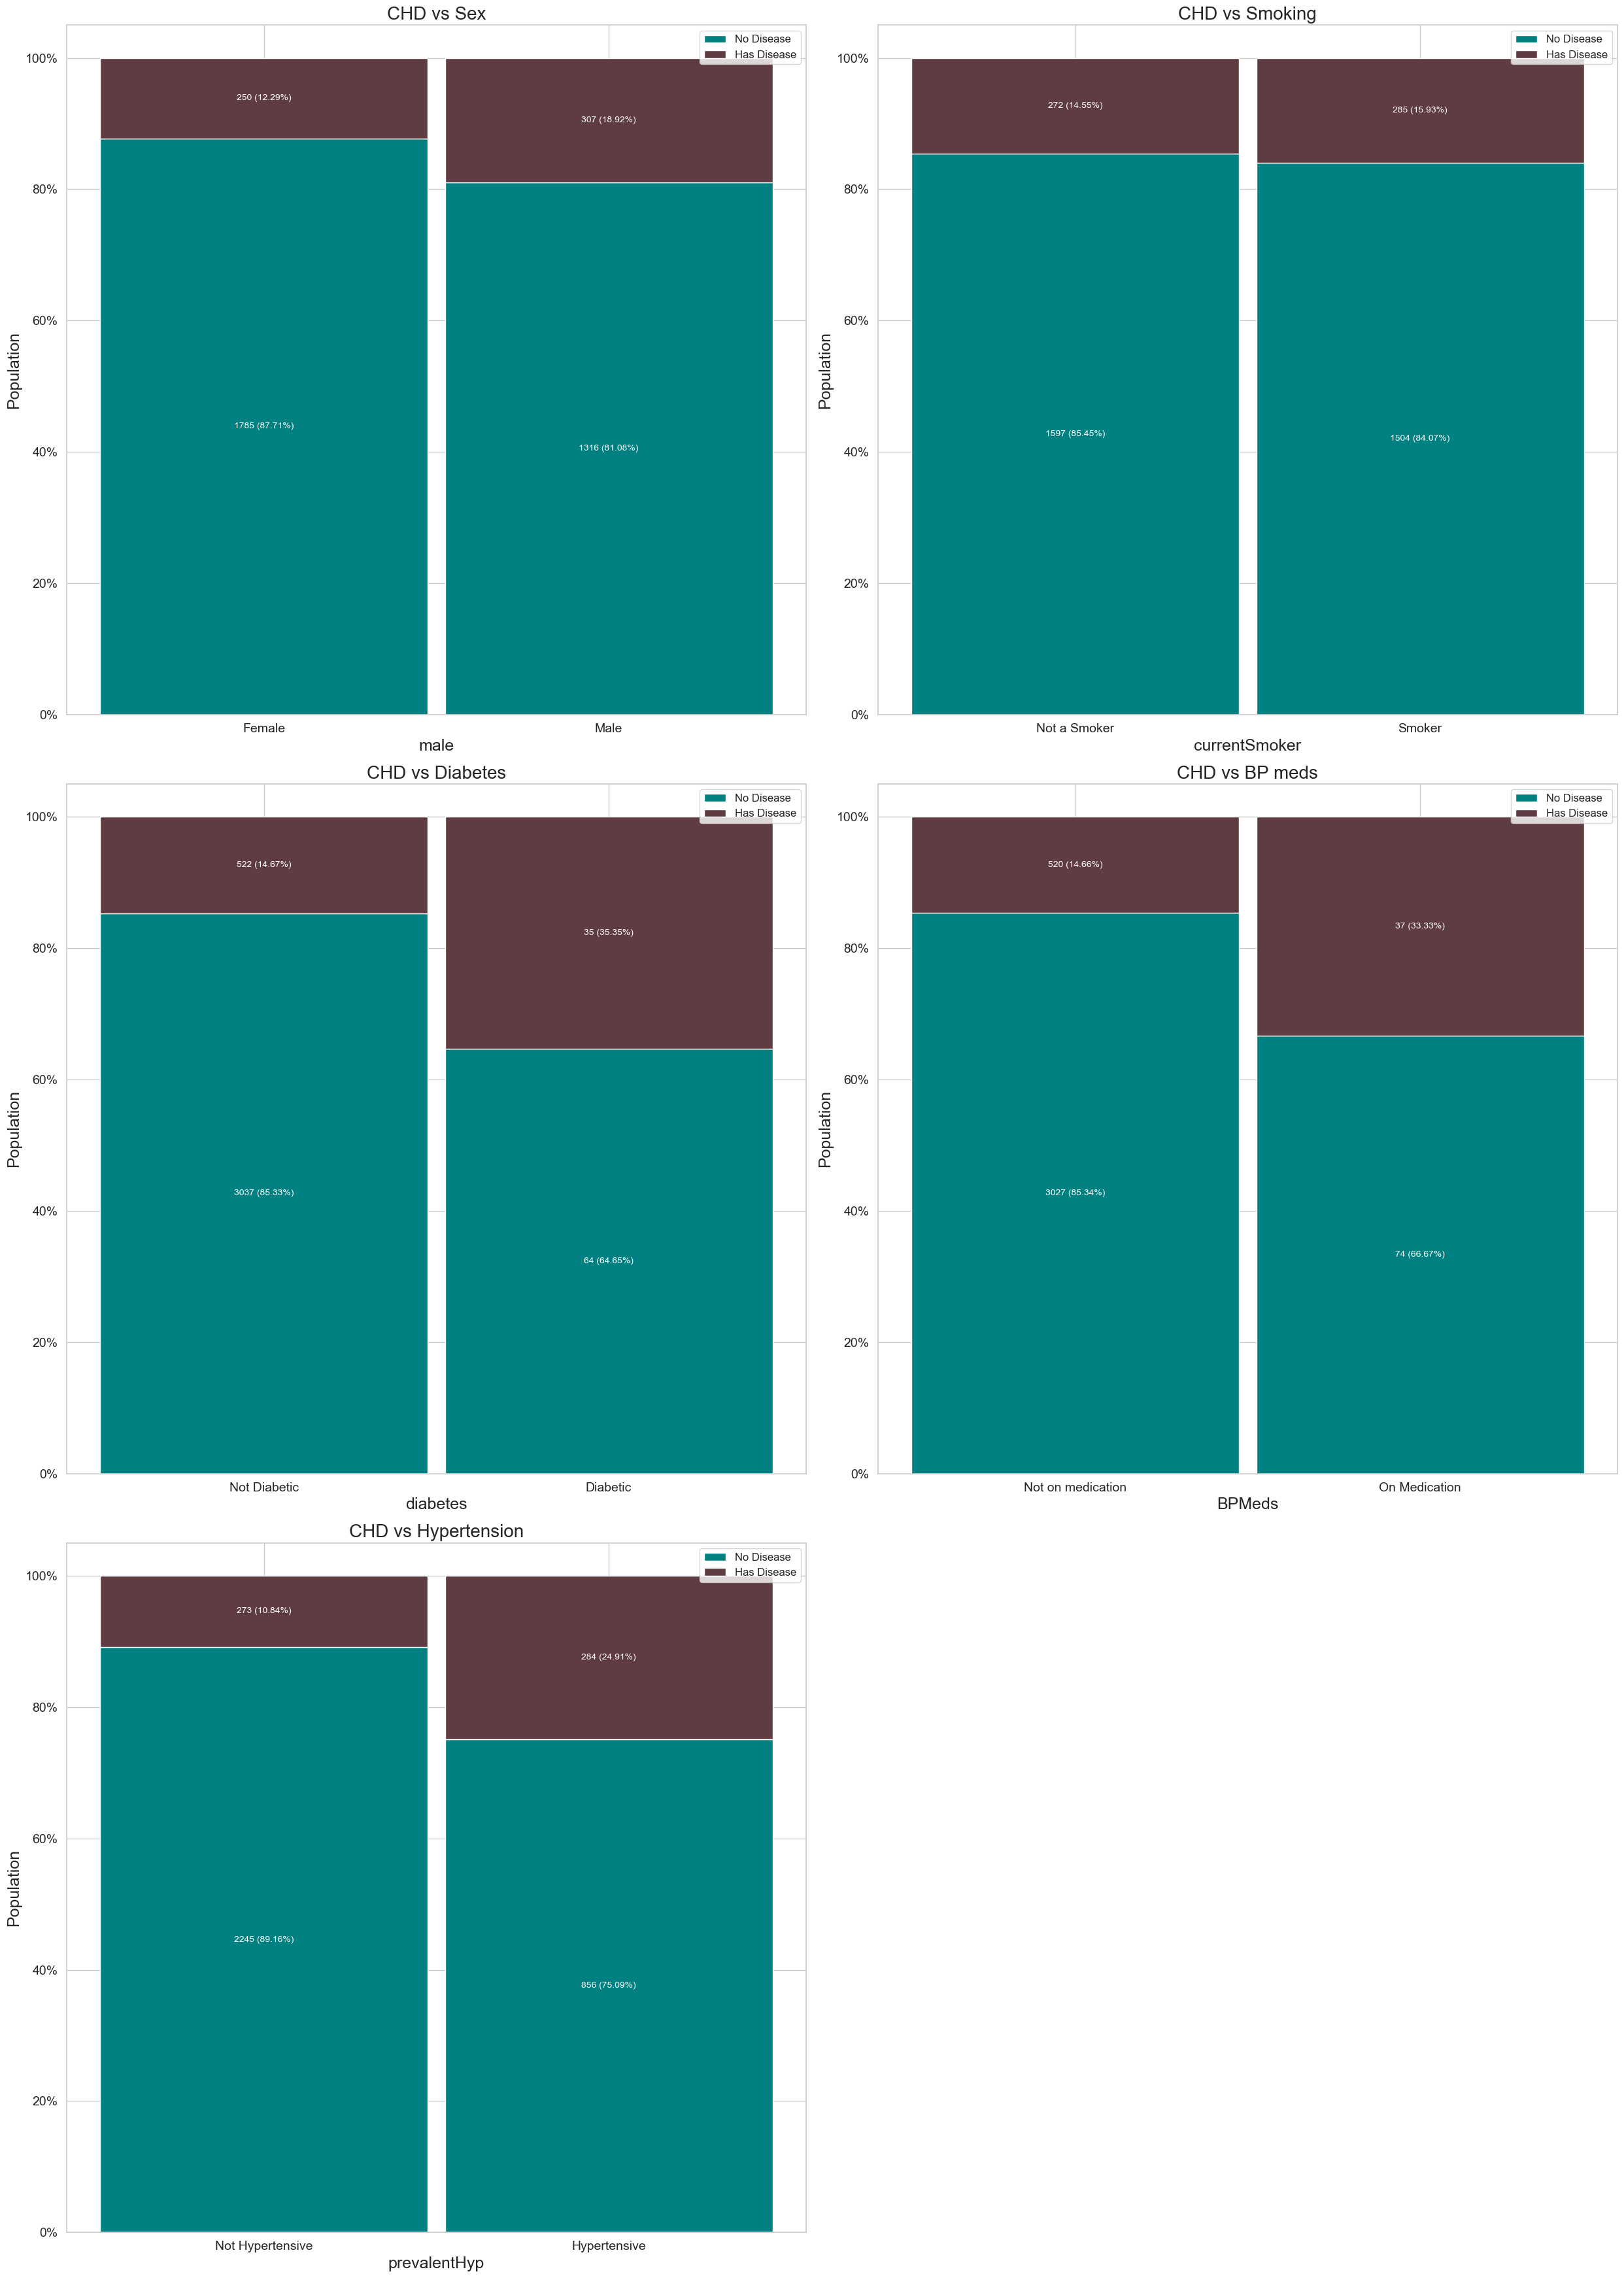

In [14]:
import numpy as np

def stacked_barchart(data, title=None, ylabel=None, xlabel=None):
    default_colors = ['#008080', '#5f3c41', '#219AD8']
    # From raw value to percentage
    totals = data.sum(axis=1)
    bars = ((data.T / totals) * 100).T
    r = np.arange(len(data.index))

    # Plot
    barWidth = 0.95
    names = data.index.tolist()
    bottom = np.zeros(bars.shape[0])

    # Create bars
    color_index = 0
    plots = []
    for bar in bars.columns:
        plots.append(plt.bar(r, bars[bar], bottom=bottom, color=default_colors[color_index], edgecolor='white', width=barWidth))
        bottom += bars[bar].values
        color_index = (color_index + 1) % len(default_colors)

    # Custom x axis
    plt.title(title)
    plt.xticks(r, names)
    plt.xlabel(xlabel if xlabel else data.index.name)
    plt.ylabel(ylabel if ylabel else data.columns.name)
    ax = plt.gca()
        
    y_labels = ax.get_yticks()
    ax.set_yticklabels([str(int(y)) + '%' for y in y_labels])

    flat_list = [item for sublist in data.T.values for item in sublist]
    for i, d in zip(ax.patches, flat_list):
        data_label = f"{d} ({round(i.get_height(), 2)}%)"
        ax.text(i.get_x() + i.get_width()/2, i.get_y() + i.get_height()/2, data_label, 
                horizontalalignment='center', verticalalignment='center', 
                fontdict=dict(color='white', size=10))

    ax.title.set_fontsize(20)
    ax.xaxis.label.set_fontsize(18)
    ax.yaxis.label.set_fontsize(18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    legend = ax.legend(plots, bars.columns.tolist(), fancybox=True, fontsize='12')
    plt.setp(legend.get_texts(), fontsize='12')

fig = plt.figure(figsize=(25, 35))
grid_rows = 3
grid_cols = 2

# Draw sex vs disease outcome
plt.subplot(grid_rows, grid_cols, 1)
temp = data[['male', 'TenYearCHD']].groupby(['male', 'TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0: 'Female', 1: 'Male'}, columns={0: 'No Disease', 1: 'Has Disease'}, inplace=True)
stacked_barchart(temp, title='CHD vs Sex', ylabel='Population')

# Draw smoking status vs disease outcome
plt.subplot(grid_rows, grid_cols, 2)
temp = data[['currentSmoker', 'TenYearCHD']].groupby(['currentSmoker', 'TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0: 'Not a Smoker', 1: 'Smoker'}, columns={0: 'No Disease', 1: 'Has Disease'}, inplace=True)
stacked_barchart(temp, title='CHD vs Smoking', ylabel='Population')

# Draw diabetes vs disease outcome
plt.subplot(grid_rows, grid_cols, 3)
temp = data[['diabetes', 'TenYearCHD']].groupby(['diabetes', 'TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0: 'Not Diabetic', 1: 'Diabetic'}, columns={0: 'No Disease', 1: 'Has Disease'}, inplace=True)
stacked_barchart(temp, title='CHD vs Diabetes', ylabel='Population')

# Draw BP meds vs disease outcome
plt.subplot(grid_rows, grid_cols, 4)
temp = data[['BPMeds', 'TenYearCHD']].groupby(['BPMeds', 'TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0: 'Not on medication', 1: 'On Medication'}, columns={0: 'No Disease', 1: 'Has Disease'}, inplace=True)
stacked_barchart(temp, title='CHD vs BP meds', ylabel='Population')

# Draw Hypertension vs disease outcome
plt.subplot(grid_rows, grid_cols, 5)
temp = data[['prevalentHyp', 'TenYearCHD']].groupby(['prevalentHyp', 'TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0: 'Not Hypertensive', 1: 'Hypertensive'}, columns={0: 'No Disease', 1: 'Has Disease'}, inplace=True)
stacked_barchart(temp, title='CHD vs Hypertension', ylabel='Population')

plt.tight_layout()
plt.show()


### 3.5 Correlation HeatMap

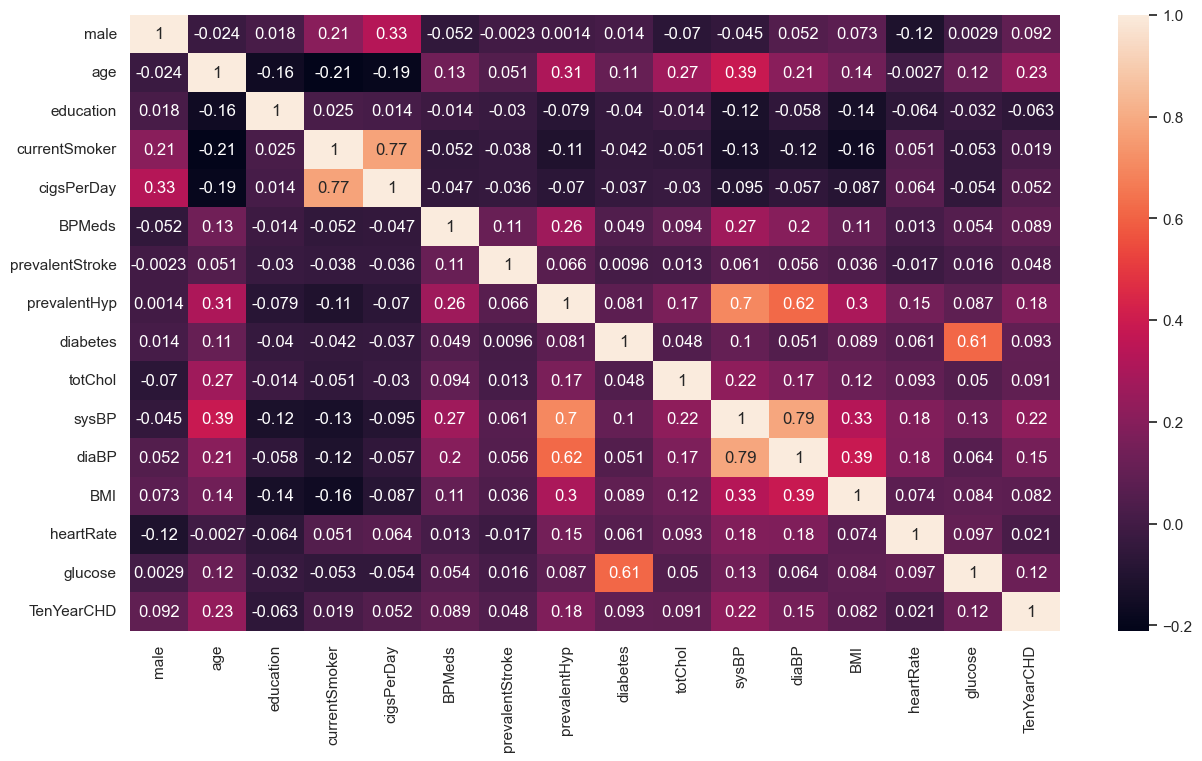

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot = True)
plt.show()

### 4. Feature Selection

In [16]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

In [17]:
#define the features
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [18]:
forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1, class_weight='balanced')

In [19]:
# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2)

In [20]:
# find all relevant features
feat_selector.fit(X, y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	9
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	9
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	9
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	9
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	9
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	9
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	9
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	9
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	9
Iteration:

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced',
                                          n_estimators=24, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x1E9FE567740),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x1E9FE567740, verbose=2)

In [21]:
# show the most important features
most_important = data.columns[:-1][feat_selector.support_].tolist()
most_important

['age', 'sysBP']

In [22]:
# select the top 6 features
top_features = data.columns[:-1][feat_selector.ranking_ <=6].tolist()
top_features

['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

#### 4.1 Choosing the top features

In [23]:
import statsmodels.api as sm

In [24]:
X_top = data[top_features]
y = data['TenYearCHD']

In [25]:
res = sm.Logit(y,X_top).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.415606
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3658
Model:                          Logit   Df Residuals:                     3651
Method:                           MLE   Df Model:                            6
Date:                Sat, 31 Aug 2024   Pseudo R-squ.:                 0.02583
Time:                        02:53:40   Log-Likelihood:                -1520.3
converged:                       True   LL-Null:                       -1560.6
Covariance Type:            nonrobust   LLR p-value:                 2.670e-15
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0234      0.006      4.114      0.000       0.012       0.035
totChol       -0.0030      0.001     -2.743      0.006      -0.005      -0.001
sysBP          0.0251      0.003      7.500      0.000       0.019       0.032
diaBP         -0.0269      0.006     -4.535      0.000      -0.039      -0.015
BMI           -0.0520      0.012     -4.289      0.000      -0.076      -0.028
heartRate     -0.0303      0.004     -8.090      0.000      -0.038      -0.023
glucose        0.0040      0.002      2.415      0.016       0.001       0.007
==============================================================================
"""

In [26]:
params = res.params
conf = res.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))

                 5%       95%  Odds Ratio
age        1.012333  1.035166    1.023686
totChol    0.994837  0.999138    0.996985
sysBP      1.018678  1.032105    1.025370
diaBP      0.962161  0.984823    0.973426
BMI        0.927086  0.972178    0.949365
heartRate  0.963073  0.977312    0.970166
glucose    1.000756  1.007291    1.004018


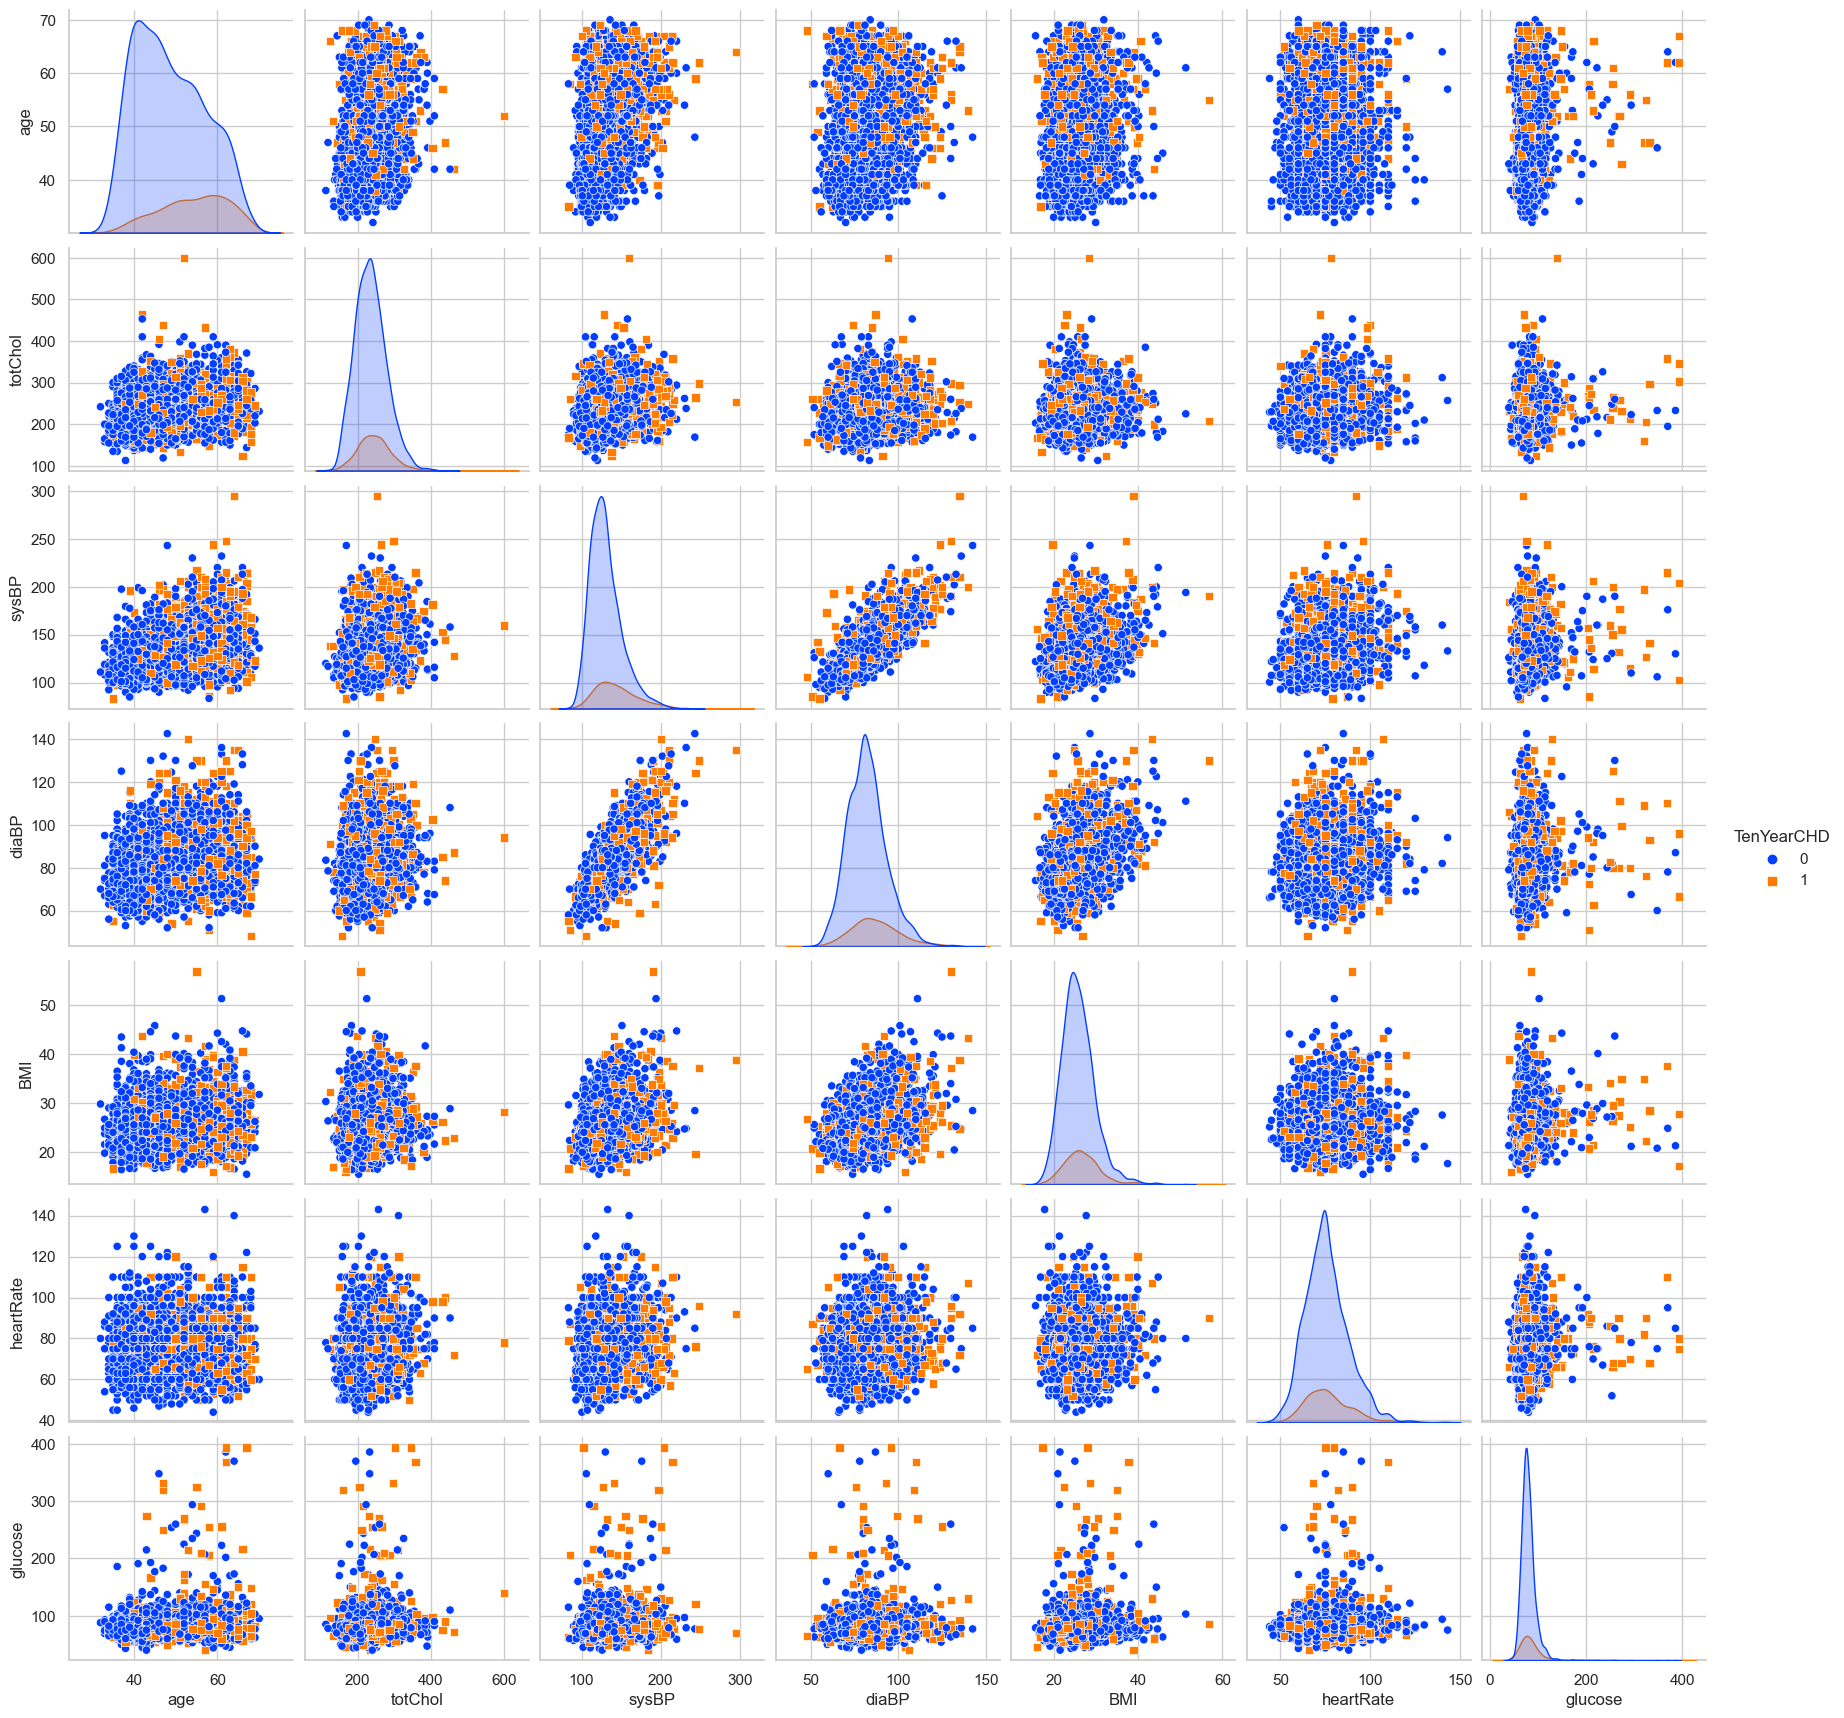

In [27]:
sns.pairplot(data, hue = 'TenYearCHD', markers=["o", "s"], vars = top_features, palette = sns.color_palette("bright", 10))

### 5. Models and Predictions

#### 5.1 SMOTE

In [28]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [29]:
X = data[top_features]
y = data.iloc[:,-1]

In [30]:
# the numbers before smote
num_before = dict(Counter(y))

#perform smoting

# define pipeline
over = SMOTE(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_smote, y_smote = pipeline.fit_resample(X, y)


#the numbers after smote
num_after =dict(Counter(y_smote))

In [31]:
print(num_before, num_after)

{0: 3101, 1: 557} {0: 3100, 1: 2480}


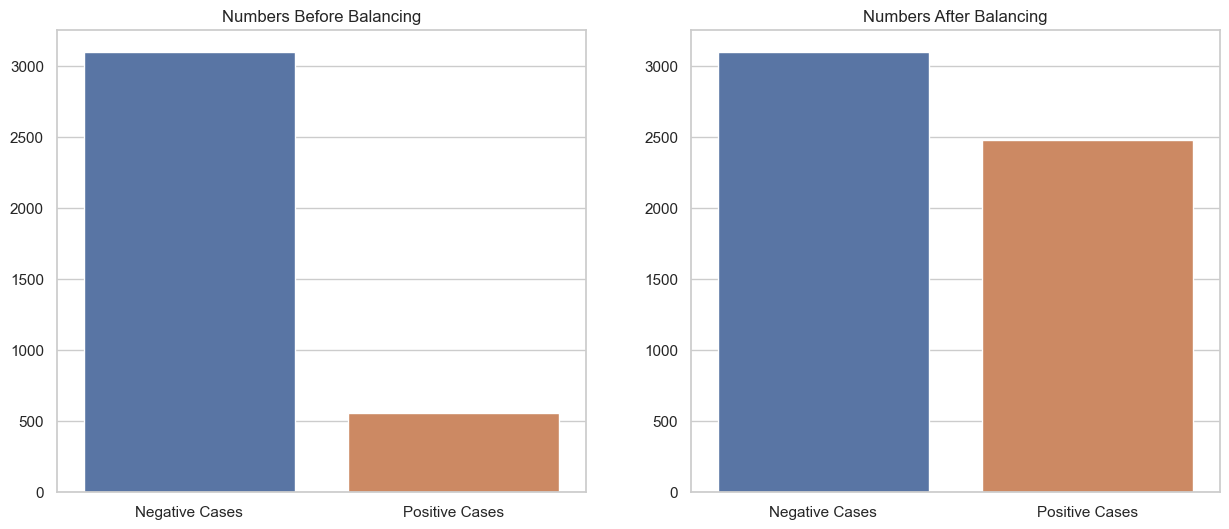

In [32]:
labels = ["Negative Cases", "Positive Cases"]

# Convert to lists for plotting
before_counts = [num_before.get(0, 0), num_before.get(1, 0)]
after_counts = [num_after.get(0, 0), num_after.get(1, 0)]

# Plot
plt.figure(figsize=(15, 6))

# Plot before SMOTE
plt.subplot(1, 2, 1)
sns.barplot(x=labels, y=before_counts)
plt.title("Numbers Before Balancing")

# Plot after SMOTE
plt.subplot(1, 2, 2)
sns.barplot(x=labels, y=after_counts)
plt.title("Numbers After Balancing")

plt.show()

#### 5.2 Splitting data into training and testing set

In [33]:
# new dataset
new_data = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
new_data.columns = ['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose','TenYearCHD']
new_data.head()

,age,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1414,36,204.0,132.5,82.5,21.27,70.0,84.0,0
1507,56,296.0,123.0,86.0,25.59,70.0,63.0,0
1943,48,237.0,124.5,66.5,33.29,80.0,91.0,0
2249,40,287.0,141.0,86.0,27.42,80.0,94.0,0
1266,51,335.0,125.5,94.0,27.77,80.0,67.0,0


In [34]:
X_new = new_data[top_features]
y_new= new_data.iloc[:,-1]
X_new.head()

,age,totChol,sysBP,diaBP,BMI,heartRate,glucose
1414,36,204.0,132.5,82.5,21.27,70.0,84.0
1507,56,296.0,123.0,86.0,25.59,70.0,63.0
1943,48,237.0,124.5,66.5,33.29,80.0,91.0
2249,40,287.0,141.0,86.0,27.42,80.0,94.0
1266,51,335.0,125.5,94.0,27.77,80.0,67.0


In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size=.2,random_state=42)

#### 5.3 Feature Scaling

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

#### 5.4 Models

##### Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

In [39]:
# search for optimun parameters using gridsearch
params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}
logistic_clf = GridSearchCV(LogisticRegression(),param_grid=params,cv=10)

In [40]:
#train the classifier
logistic_clf.fit(X_train,y_train)

logistic_clf.best_params_

{'C': 0.1, 'class_weight': None, 'penalty': 'l2'}

In [41]:
#make predictions
logistic_predict = logistic_clf.predict(X_test)

In [42]:
log_accuracy = accuracy_score(y_test,logistic_predict)
print(f"Using logistic regression we get an accuracy of {round(log_accuracy*100,2)}%")

Using logistic regression we get an accuracy of 65.5%


<Axes: >

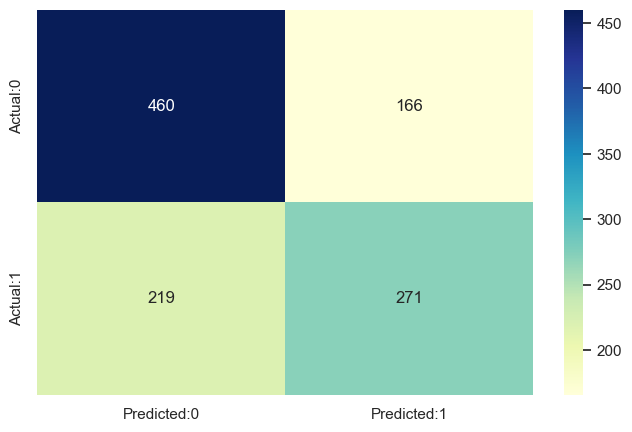

In [43]:
cm=confusion_matrix(y_test,logistic_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [44]:
print(classification_report(y_test,logistic_predict))

              precision    recall  f1-score   support

           0       0.68      0.73      0.70       626
           1       0.62      0.55      0.58       490

    accuracy                           0.66      1116
   macro avg       0.65      0.64      0.64      1116
weighted avg       0.65      0.66      0.65      1116



In [45]:
logistic_f1 = f1_score(y_test, logistic_predict)
print(f'The f1 score for logistic regression is {round(logistic_f1*100,2)}%')

The f1 score for logistic regression is 58.47%


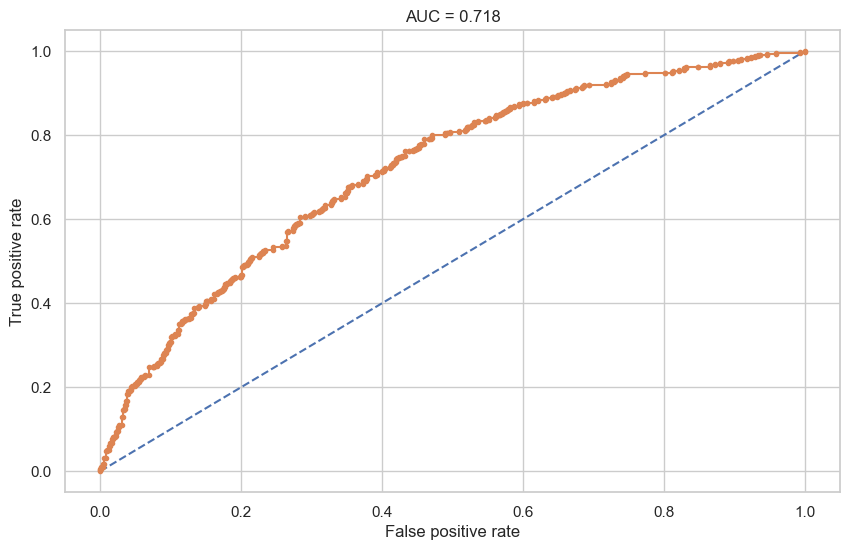

In [46]:
# ROC curve and AUC 
probs = logistic_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_auc,3)}")
plt.show()

##### Support Vector Machine (SVM)

In [47]:
from sklearn.svm import SVC

In [48]:
#grid search for optimum parameters
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
svm_clf = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid, cv=10)

In [49]:
# train the model
svm_clf.fit(X_train,y_train)
svm_clf.best_params_ 

{'C': 10, 'gamma': 1}

In [50]:
# predictions
svm_predict = svm_clf.predict(X_test)

In [51]:
#accuracy
svm_accuracy = accuracy_score(y_test,svm_predict)
print(f"Using SVM we get an accuracy of {round(svm_accuracy*100,2)}%")

Using SVM we get an accuracy of 84.23%


<Axes: >

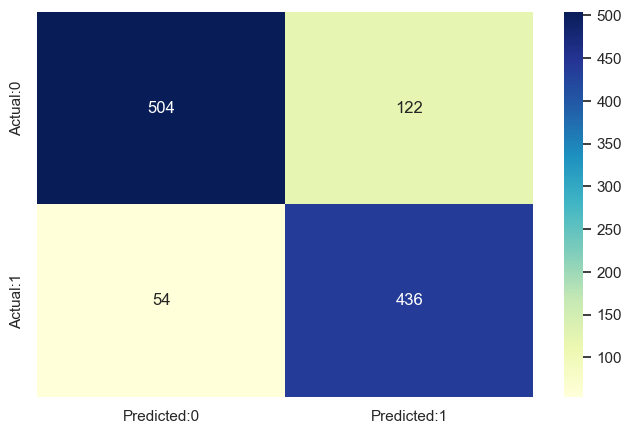

In [52]:
cm=confusion_matrix(y_test,svm_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [53]:
print(classification_report(y_test,svm_predict))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85       626
           1       0.78      0.89      0.83       490

    accuracy                           0.84      1116
   macro avg       0.84      0.85      0.84      1116
weighted avg       0.85      0.84      0.84      1116



In [54]:
svm_f1 = f1_score(y_test, svm_predict)
print(f'The f1 score for SVM is {round(svm_f1*100,2)}%')

The f1 score for SVM is 83.21%


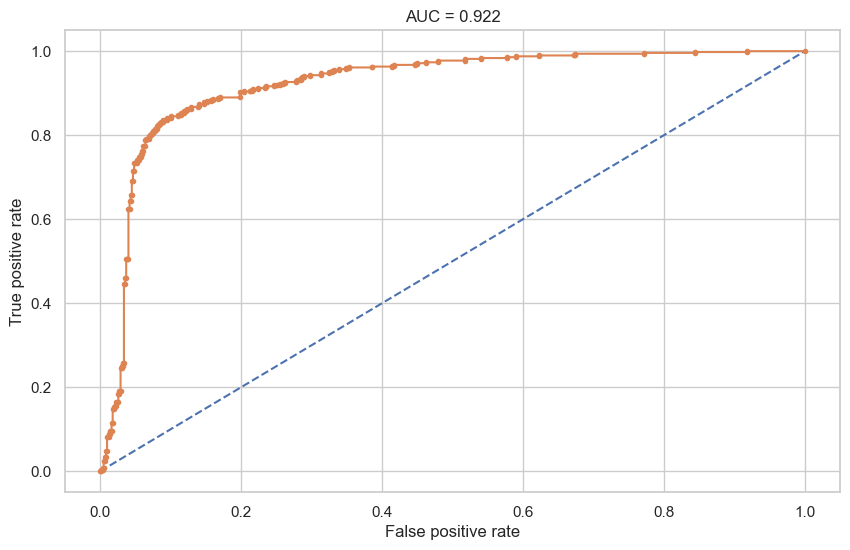

In [55]:
# ROC curve and AUC 
probs = svm_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
svm_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(svm_auc,3)}")
plt.show()

##### k-Nearest Neighbour

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
# search for optimun parameters using gridsearch
params= {'n_neighbors': np.arange(1, 10)}
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = params, 
                           scoring = 'accuracy', cv = 10, n_jobs = -1)
knn_clf = GridSearchCV(KNeighborsClassifier(),params,cv=3, n_jobs=-1)

In [58]:
# train the model
knn_clf.fit(X_train,y_train)
knn_clf.best_params_ 

{'n_neighbors': 1}

In [59]:
# predictions
knn_predict = knn_clf.predict(X_test)

In [60]:
#accuracy
knn_accuracy = accuracy_score(y_test,knn_predict)
print(f"Using k-nearest neighbours we get an accuracy of {round(knn_accuracy*100,2)}%")

Using k-nearest neighbours we get an accuracy of 85.22%


<Axes: >

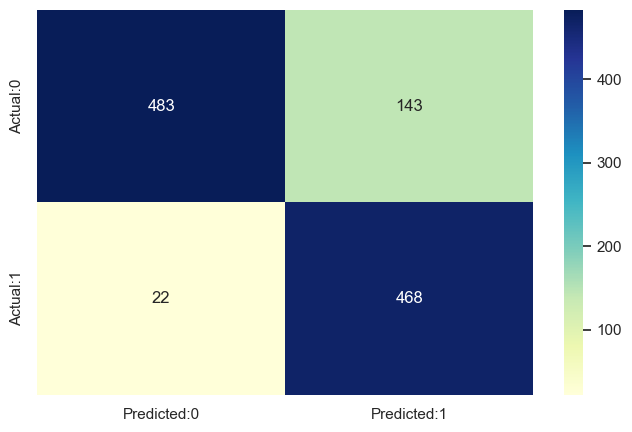

In [61]:
cm=confusion_matrix(y_test,knn_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [62]:
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

           0       0.96      0.77      0.85       626
           1       0.77      0.96      0.85       490

    accuracy                           0.85      1116
   macro avg       0.86      0.86      0.85      1116
weighted avg       0.87      0.85      0.85      1116



In [63]:
knn_f1 = f1_score(y_test, knn_predict)
print(f'The f1 score for K nearest neignbours is {round(knn_f1*100,2)}%')

The f1 score for K nearest neignbours is 85.01%


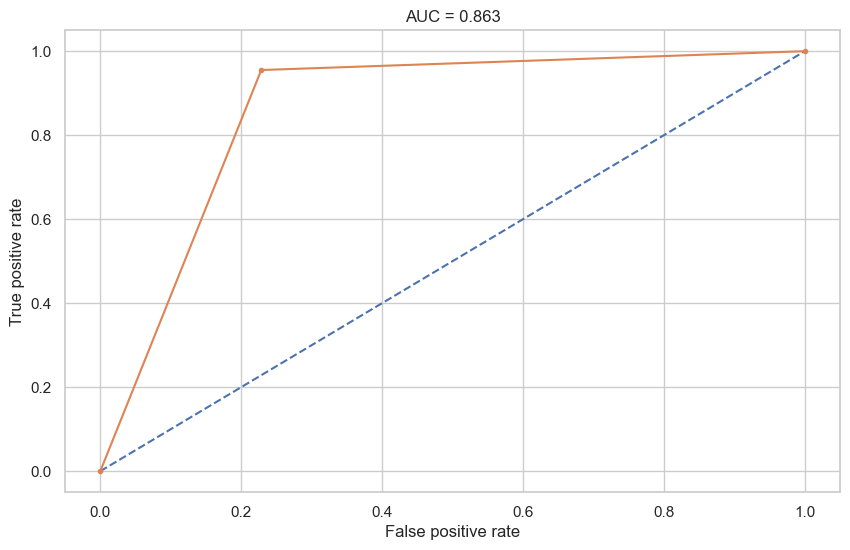

In [64]:
# ROC curve and AUC 
probs = knn_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(knn_auc,3)}")
plt.show()

##### Decision Trees

In [65]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(random_state=7)

In [66]:
# grid search for optimum parameters
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11]}
tree_clf = GridSearchCV(dtree, param_grid=params, n_jobs=-1)

In [67]:
# train the model
tree_clf.fit(X_train,y_train)
tree_clf.best_params_ 

{'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 7}

In [68]:
# predictions
tree_predict = tree_clf.predict(X_test)

In [69]:
#accuracy
tree_accuracy = accuracy_score(y_test,tree_predict)
print(f"Using Decision Trees we get an accuracy of {round(tree_accuracy*100,2)}%")

Using Decision Trees we get an accuracy of 73.57%


<Axes: >

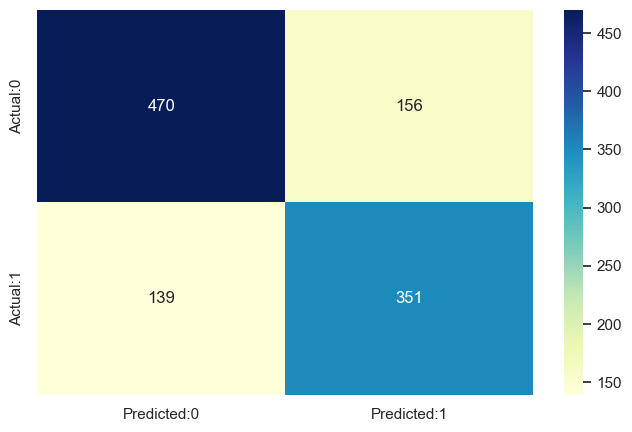

In [70]:
cm=confusion_matrix(y_test,tree_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [71]:
print(classification_report(y_test,tree_predict))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       626
           1       0.69      0.72      0.70       490

    accuracy                           0.74      1116
   macro avg       0.73      0.73      0.73      1116
weighted avg       0.74      0.74      0.74      1116



In [72]:
tree_f1 = f1_score(y_test, tree_predict)
print(f'The f1 score Descision trees is {round(tree_f1*100,2)}%')

The f1 score Descision trees is 70.41%


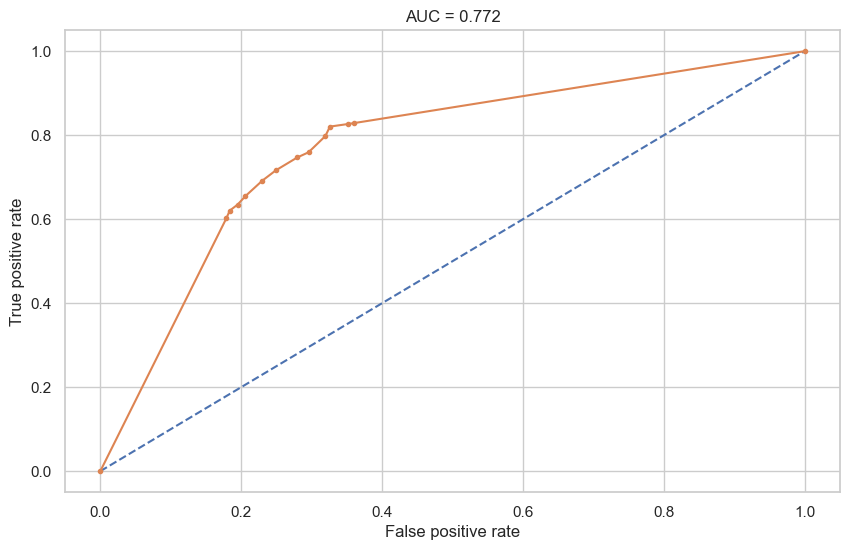

In [73]:
# ROC curve and AUC 
probs = tree_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
tree_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(tree_auc,3)}")
plt.show()

#### Model Comparisons

In [74]:
comparison = pd.DataFrame({
    "Logistic regression":{'Accuracy':log_accuracy, 'AUC':log_auc, 'F1 score':logistic_f1},
    "K-nearest neighbours":{'Accuracy':knn_accuracy, 'AUC':knn_auc, 'F1 score':knn_f1},
    "Decision trees":{'Accuracy':tree_accuracy, 'AUC':tree_auc, 'F1 score':tree_f1},
    "Support vector machine":{'Accuracy':svm_accuracy, 'AUC':svm_auc, 'F1 score':svm_f1}
}).T

In [75]:
comparison

,Accuracy,AUC,F1 score
Logistic regression,0.655018,0.718142,0.584682
K-nearest neighbours,0.852151,0.863334,0.850136
Decision trees,0.735663,0.772037,0.704112
Support vector machine,0.842294,0.922431,0.832061


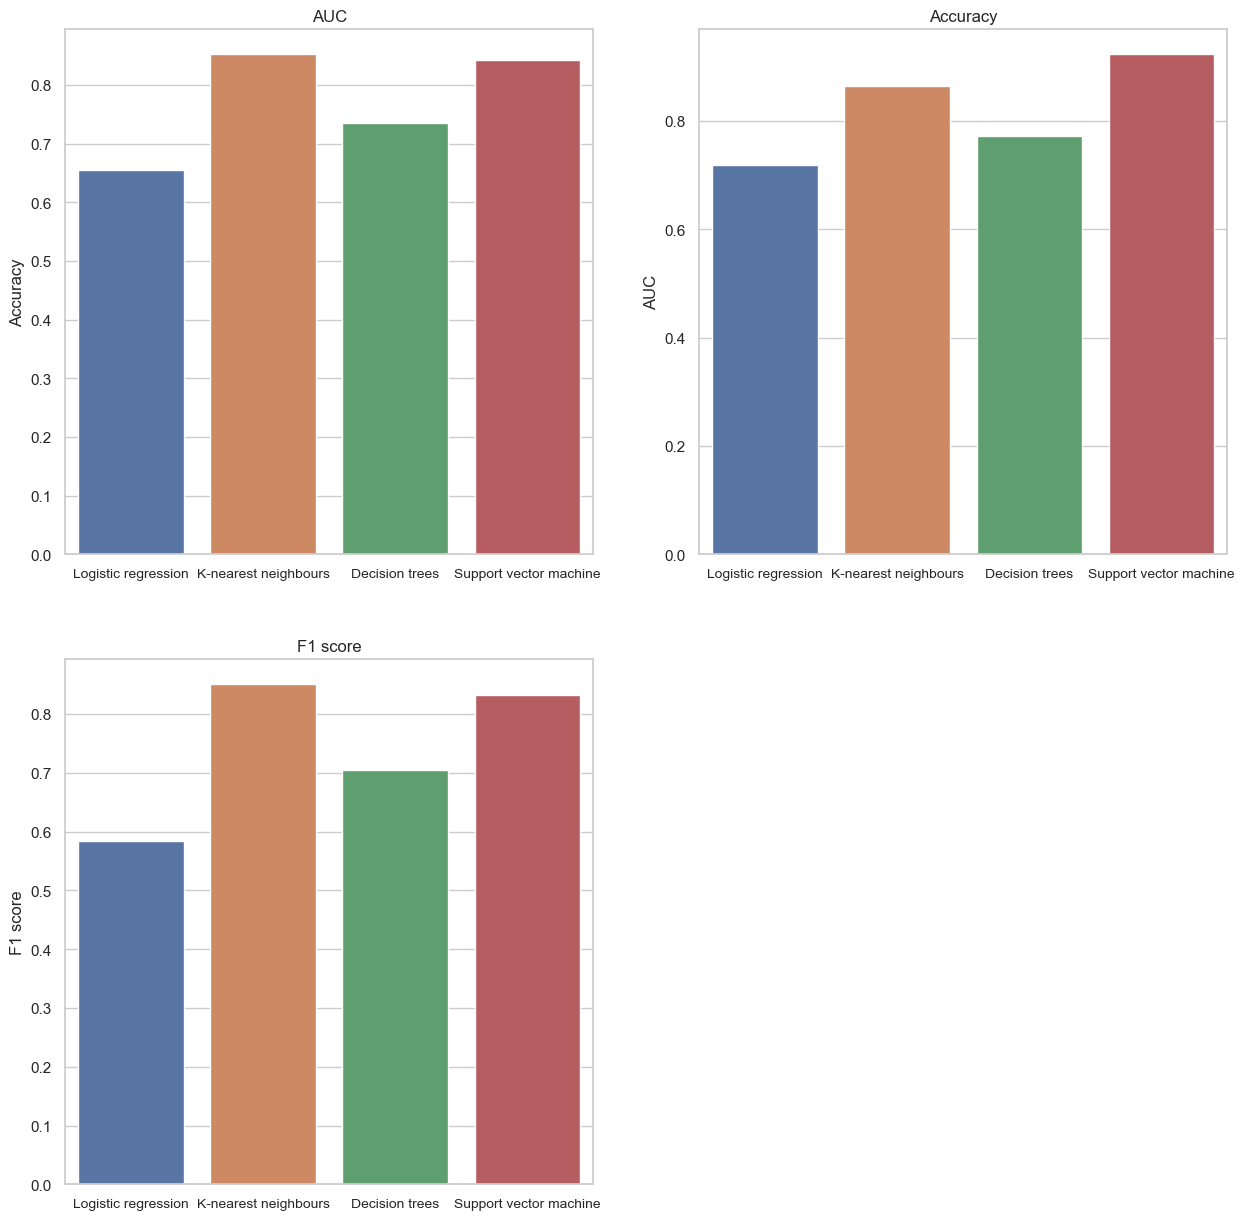

In [76]:
fig = plt.gcf()
fig.set_size_inches(15, 15)
titles = ['AUC','Accuracy','F1 score']
for title,label in enumerate(comparison.columns):
    plt.subplot(2,2,title+1)
    sns.barplot(x=comparison.index, y = comparison[label], data=comparison)
    plt.xticks(fontsize=10)
    plt.title(titles[title])
plt.show()